In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

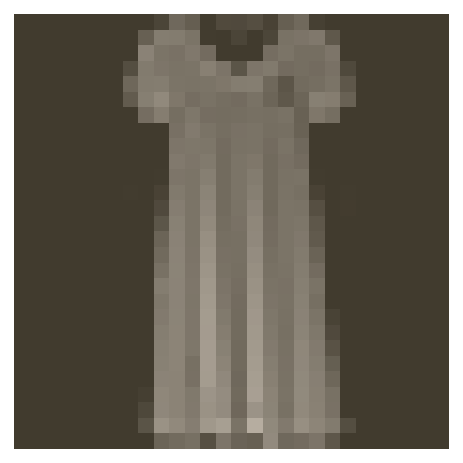

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [4]:
#train the loader
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)


Epoch: 1/2..  Training Loss: 1.685..  Test Loss: 0.964..  Test Accuracy: 0.650
Epoch: 1/2..  Training Loss: 0.976..  Test Loss: 0.729..  Test Accuracy: 0.730
Epoch: 1/2..  Training Loss: 0.849..  Test Loss: 0.666..  Test Accuracy: 0.753
Epoch: 1/2..  Training Loss: 0.780..  Test Loss: 0.624..  Test Accuracy: 0.757
Epoch: 1/2..  Training Loss: 0.765..  Test Loss: 0.603..  Test Accuracy: 0.766
Epoch: 1/2..  Training Loss: 0.721..  Test Loss: 0.589..  Test Accuracy: 0.779
Epoch: 1/2..  Training Loss: 0.687..  Test Loss: 0.597..  Test Accuracy: 0.776
Epoch: 1/2..  Training Loss: 0.664..  Test Loss: 0.554..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.648..  Test Loss: 0.564..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.655..  Test Loss: 0.534..  Test Accuracy: 0.802
Epoch: 1/2..  Training Loss: 0.633..  Test Loss: 0.521..  Test Accuracy: 0.805
Epoch: 1/2..  Training Loss: 0.636..  Test Loss: 0.540..  Test Accuracy: 0.801
Epoch: 1/2..  Training Loss: 0.631..  Test Loss: 0.5

In [6]:
#save_loading the models

print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [8]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [9]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [10]:
model = fc_model.Network(784, 10, [400, 200, 100])
#error
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param with shape torch.Size([512, 784]) from checkpoint, the shape in current model is torch.Size([400, 784]).
	size mismatch for hidden_layers.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([400]).
	size mismatch for hidden_layers.1.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([200, 400]).
	size mismatch for hidden_layers.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for hidden_layers.2.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([100, 200]).
	size mismatch for hidden_layers.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for output.weight: copying a param with shape torch.Size([10, 128]) from checkpoint, the shape in current model is torch.Size([10, 100]).

In [ ]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [ ]:
model = load_checkpoint('checkpoint.pth')
print(model)